<a href="https://colab.research.google.com/github/Supriyo-ux/DataScience-Analytics-R-Python/blob/master/DiabetesPrediction_RandomForest_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I am implementing Random Forest in this notebook using Pima Indians Diabetes dataset.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing,

In [ ]:
# Importing required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,make_scorer
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
%matplotlib inline

In [ ]:
data= pd.read_csv("diabetes.csv")

In [ ]:
# Returning first few observations
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Returning dimensions of dataframe
data.shape

(768, 9)

In [ ]:
#  List of column names
data.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [ ]:
# Returning dtypes of each column
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# Returning no. of missing values in each column
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Generating descriptive statistics
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Replace 0 by NAN
data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)

In [ ]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
#Filling NAN values
data['Glucose'].fillna(data['Glucose'].median() , inplace= True)
data['BloodPressure'].fillna(data['BloodPressure'].median(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].mean(), inplace = True)

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

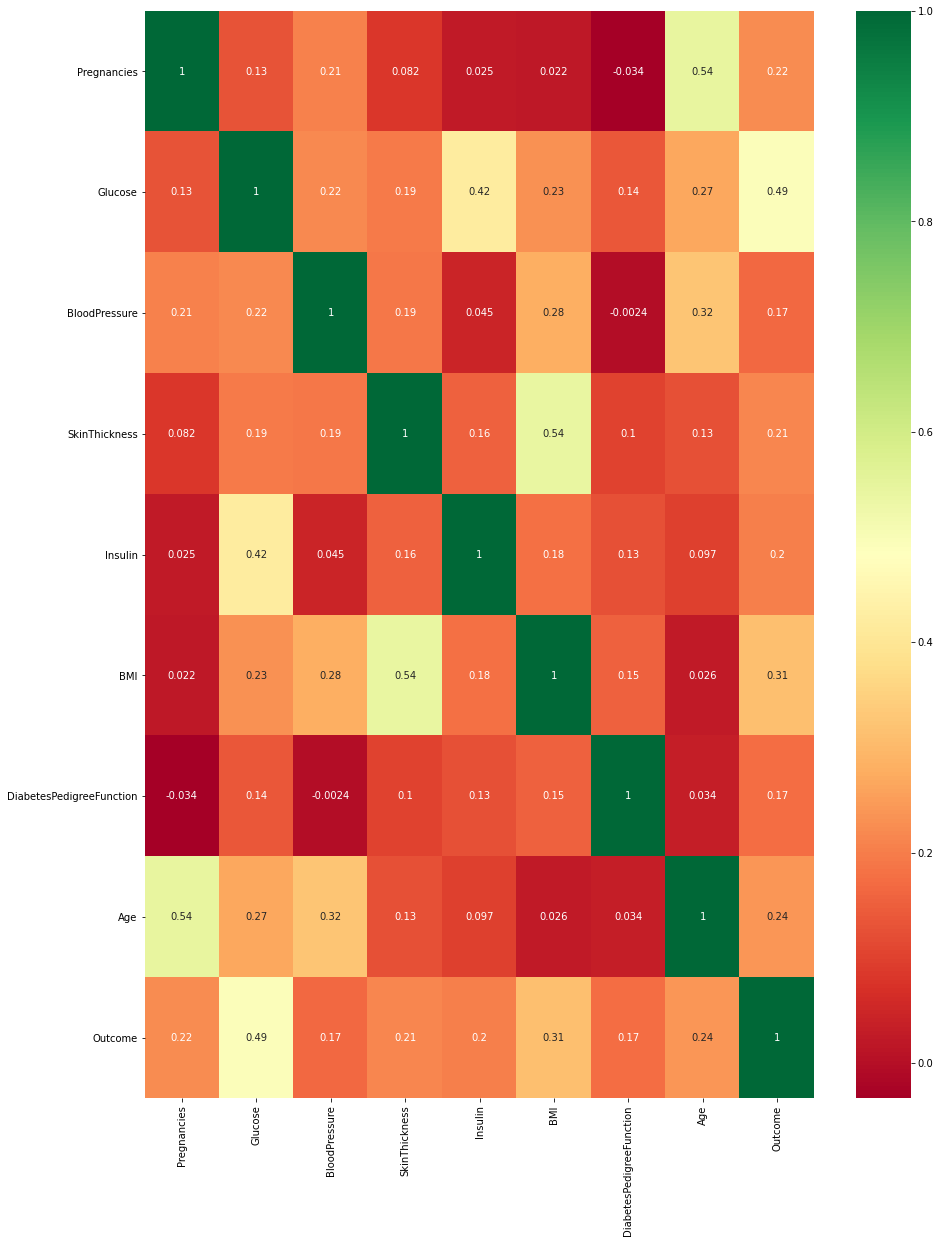

In [ ]:
# Getting correlations of each features in dataframe

corrmat= data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,20))

# Plotting heat map

g= sns.heatmap(data[top_corr_features].corr(), annot= True, cmap= "RdYlGn")

In [ ]:
# Finding pairwise correlation of all columns
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021565,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.230862,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281319,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543162,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180170,0.126503,0.097101,0.203790
BMI,0.021565,0.230862,0.281319,0.543162,0.180170,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.311924,0.173844,0.238356,1.000000


In [ ]:
# Getting unique values 

data['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [ ]:
# Finding counts of unique values and sorting it in ascending order
data['Pregnancies'].value_counts().sort_values()

17      1
15      1
14      2
12      9
13     10
11     11
10     24
9      28
8      38
7      45
6      50
5      57
4      68
3      75
2     103
0     111
1     135
Name: Pregnancies, dtype: int64

In [ ]:

data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# Grouping predictor variables by target variable
data.groupby('Outcome')[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI','Age']].agg(['max', 'min', 'mean'])

Pregnancies               Glucose  ...        BMI Age               
                max min      mean     max  ...       mean max min       mean
Outcome                                    ...                              
0                13   0  3.298000   197.0  ...  30.888434  81  21  31.190000
1                17   0  4.865672   199.0  ...  35.384757  70  21  37.067164

[2 rows x 21 columns]

In [ ]:
#finding count of target variable
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

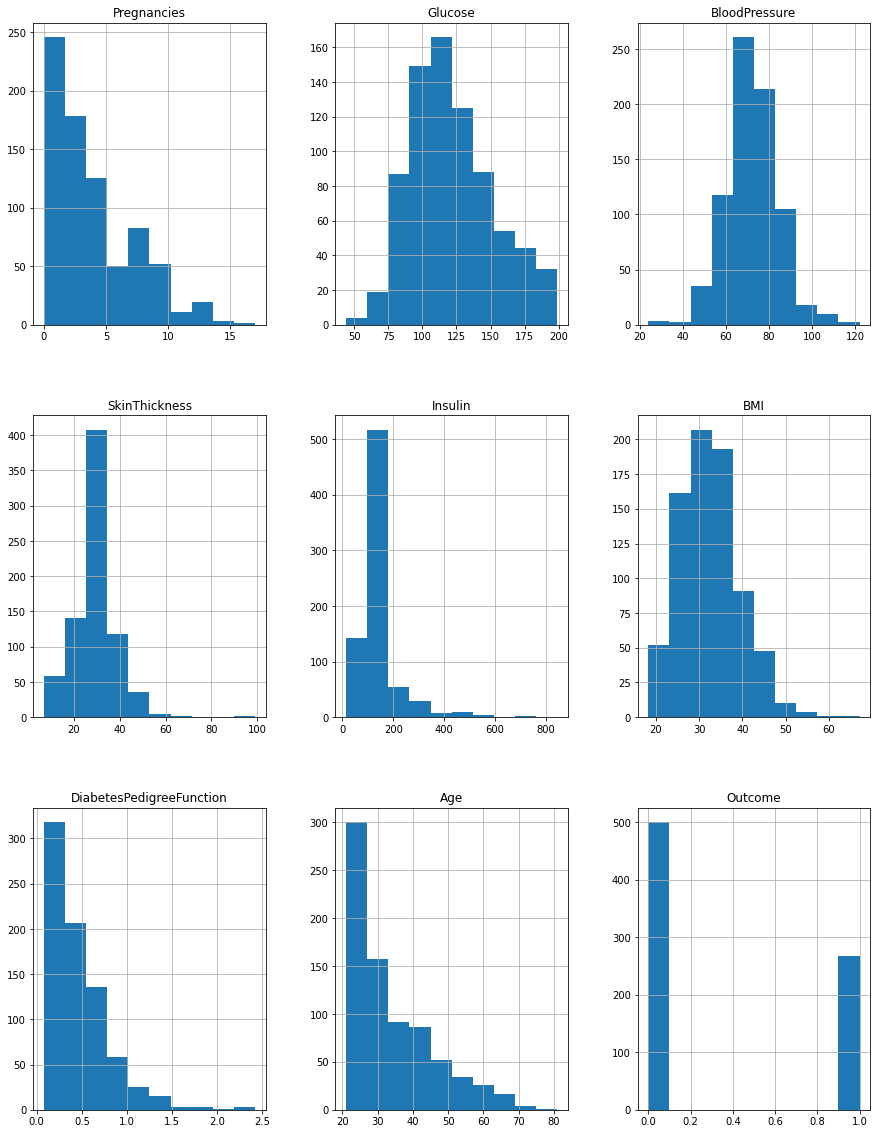

In [ ]:
# Plotting histogram of dataframe

p = data.hist(figsize = (15,20))

In [ ]:
# Creating Predictor Matrix

X = data.drop('Outcome',axis = 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
#Target variable
y = data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
# Splitting the matrices into random train & test subsets where test data contains 25% data and rest considered as training data

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state= 200)

In [ ]:
# Getting dimensions of train & test subsets

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [ ]:
# Instantiating random forest classifier

clf = RandomForestClassifier(oob_score=True , n_jobs=-1, random_state=100)
clf 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

Cross validation score should between 0 and 1 and as high as possible. Here cross validation has been performed to find how well model is performing in terms of F1 score.

In [ ]:
# Performing K-fold cross validation with 5 folds 
scores= cross_val_score(clf, X_train, y_train, cv=5, scoring="f1_macro")
scores.mean()

0.7139192769714777

In [ ]:
# Building a forest of trees from training set

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [ ]:
# Predicting on classifier created
train_pred= clf.predict(X_train)
test_pred= clf.predict(X_test)

In [ ]:
# Finding F1 score of training and testing sets 
print('The training F1 score is:', f1_score(train_pred, y_train))
print('The test F1 score is:', f1_score(test_pred, y_test))

The training F1 score is: 1.0
The test F1 score is: 0.6942148760330579


Training F1 score is high but testing F1 score is low. It shows that the model is overfitting. Model should have high training as well as high testing accuracy. Generally training score close to 1 means model is overfitting. But if you have low training accuracy but equally weighted testing accuracy then it's good generalized model

Now, hyperparameter tuning needs to be done and looking for high F1 score that is why scorer variable is defined.

In [ ]:
#  Tuning hyperparameters

parameters = {
             "max_depth":[2,3,4],
             "n_estimators":[100,104,106],
             "min_samples_split":[3,4,5],
             "min_samples_leaf":[4,8,9]
             }

scorer = make_scorer(f1_score)

In [ ]:
# Using Randomized Search CV to find best optimal hyperparameter that best describe a classifier
clf1= RandomizedSearchCV(clf, parameters, scoring=scorer)
# Fitting the model
clf1.fit(X_train, y_train)

# Getting best estimator having high score

best_clf_random = clf1.best_estimator_
best_clf_random

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=104,
                       n_jobs=-1, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [ ]:
# Again, finding cross validation score

scores = cross_val_score(best_clf_random,X_train,y_train,cv = 5,scoring = "f1_macro")
scores.mean()

0.7023230729599664

In [ ]:
 #Fitting the best estimator

best_clf_random.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=104,
                       n_jobs=-1, oob_score=True, random_state=100, verbose=0,
                       warm_start=False)

In [ ]:
# Getting first estimator

best_clf_random.estimators_[0]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=186422792, splitter='best')

In [ ]:
# Predicting on best estimator

train_pred = best_clf_random.predict(X_train)
test_pred = best_clf_random.predict(X_test)

In [ ]:
# Finding the F1 score of training & testing sets

print("The training F1 score is: ",f1_score(train_pred,y_train))
print("The testing F1 score is :",f1_score(test_pred,y_test))

The training F1 score is:  0.6843501326259946
The testing F1 score is : 0.7304347826086958


In [ ]:
# Getting accuracy score 

accuracy_score(y_test,test_pred)

0.8385416666666666

Accuracy score is 83% and this is really a good score.

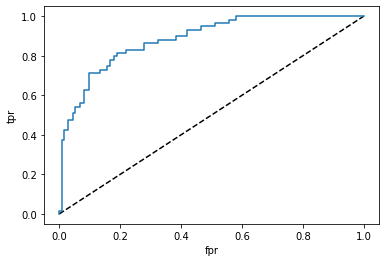

In [ ]:
# Plotting ROC curve

fpr,tpr,thresholds = roc_curve(y_test,best_clf_random.predict_proba(X_test)[:,1])

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

Having high Roc curve shows model is performing well.

In [ ]:
# Computing confusion matrix
pd.crosstab(y_test, test_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,119,14,133
1,17,42,59
All,136,56,192


True Positive is when your actual value is 1 and your classifier predicts as 1. True Negative is when your actual value is 0 and your predicted value is 0. False positive is when your actual value is 0 and your predicted value is 1. False Negative is when your actual value is 1 and your predicted value is 0.

Text(33.0, 0.5, 'Actual Label')

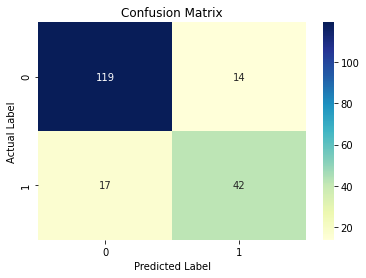

In [ ]:
# Plotting confusion matrix

cnf_matrix = confusion_matrix(y_test,test_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = "YlGnBu",fmt = 'g')
plt.title("Confusion Matrix",y = 1.1)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [ ]:
# Computing the precision

precision_score(y_test,test_pred)

0.75

In [ ]:
# Computing the sensitivity/recall score

recall_score(y_test,test_pred)

0.711864406779661

In [ ]:
# Getting feature importances

imp_features = pd.Series(best_clf_random.feature_importances_,index = X.columns)
imp_features.sort_values(ascending = False)

Glucose                     0.358739
Age                         0.175411
BMI                         0.170254
DiabetesPedigreeFunction    0.077345
Insulin                     0.072882
SkinThickness               0.061724
Pregnancies                 0.055389
BloodPressure               0.028258
dtype: float64

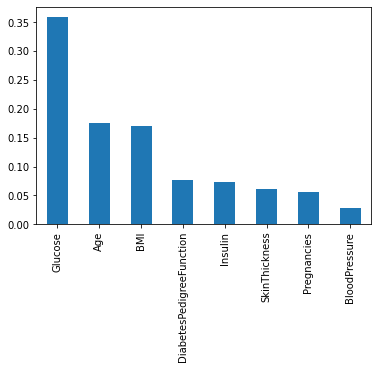

In [ ]:
# Plotting feature importances 

imp_features.sort_values(ascending = False).plot(kind = "bar")